In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee-churn-rate/hr_employee_churn_data.csv


In [2]:
df = pd.read_csv('/kaggle/input/employee-churn-rate/hr_employee_churn_data.csv')

In [3]:
df.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


In [5]:
df.shape

(14999, 10)

In [6]:
df.describe()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14997.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612863,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,4329.982679,0.248634,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
df['Work_accident'].unique()

array([0, 1])

In [8]:
df['promotion_last_5years'].unique()

array([0, 1])

**Exploratory Data Analysis**

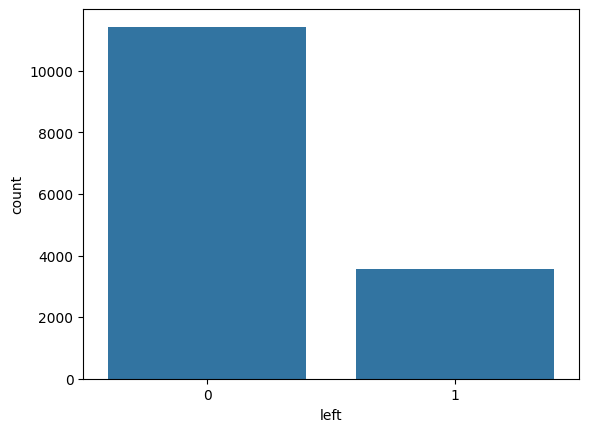

In [9]:
#check total employee range based on target column 'left'
sns.countplot(x='left',data=df)
plt.show()
#Conclusion from graph: less people left
#dataset is imbalanced

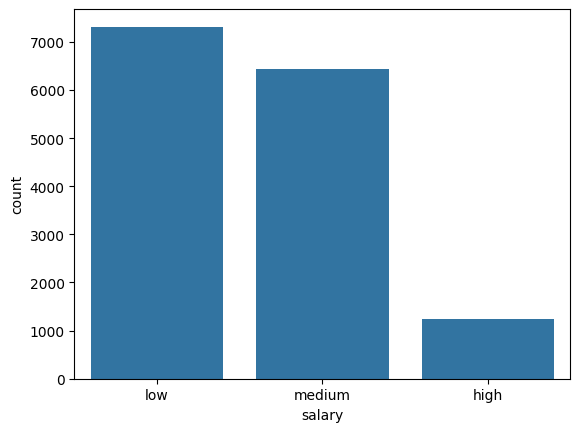

In [10]:
#plotting graph for categorical data column
sns.countplot(x='salary',data=df)
plt.show()
#conclusion from graph: low salary employee count is high

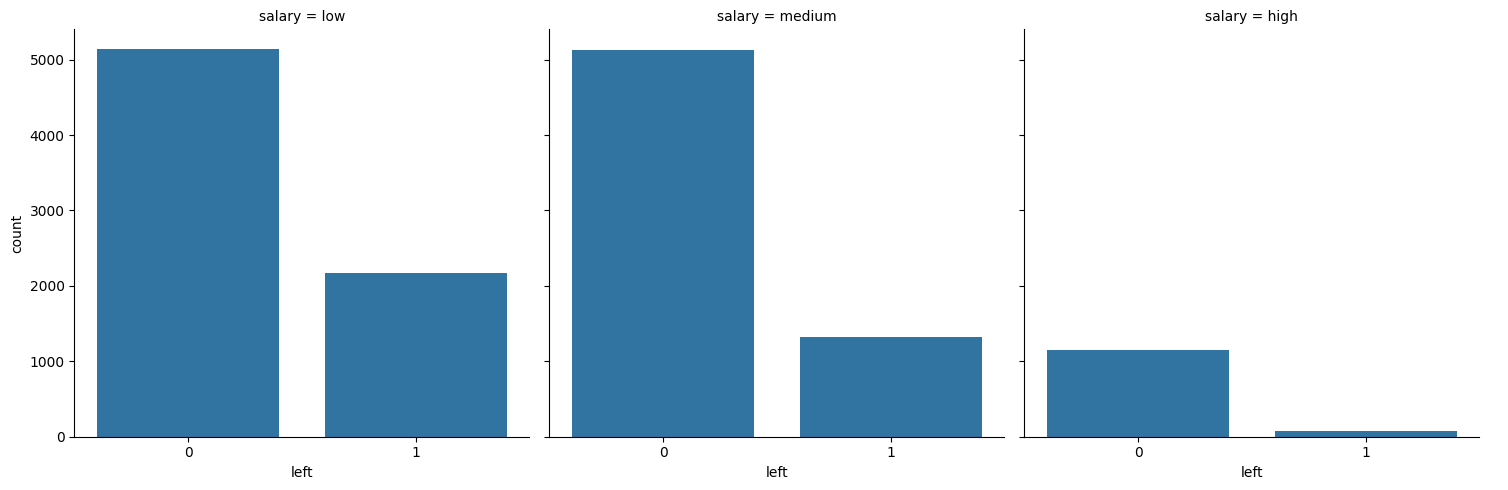

In [11]:
#'left' split over the 'salary' column
sns.catplot(x='left',col='salary',kind='count',data=df)
#low salary people are leaving company

<Axes: xlabel='promotion_last_5years', ylabel='count'>

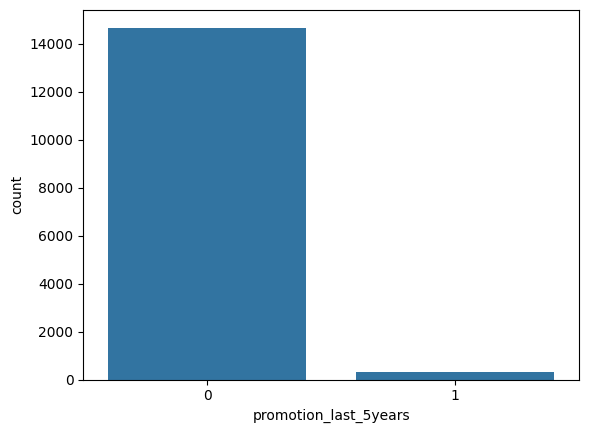

In [12]:
sns.countplot(x='promotion_last_5years',data=df)
#non promoted employee count is high

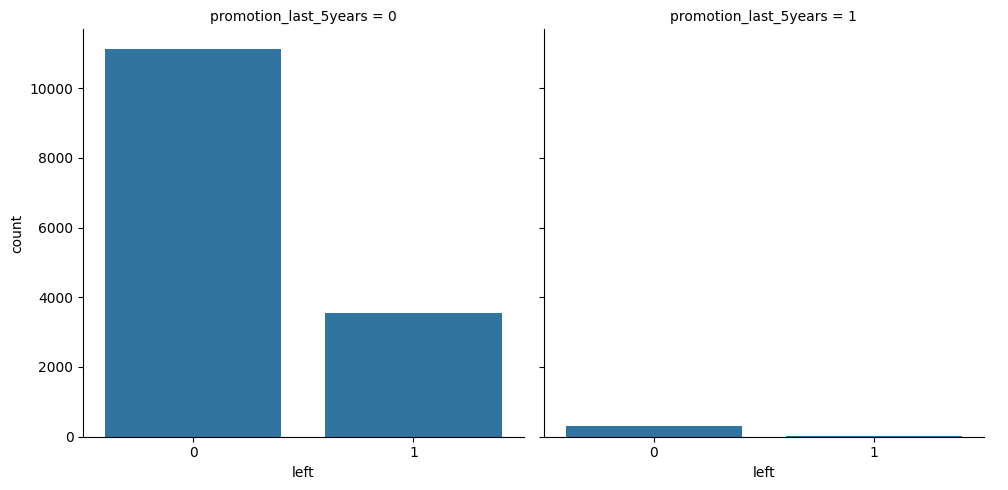

In [13]:
sns.catplot(x='left',col='promotion_last_5years',kind='count',data=df)
#non promoted people left company more

<Axes: xlabel='Work_accident', ylabel='count'>

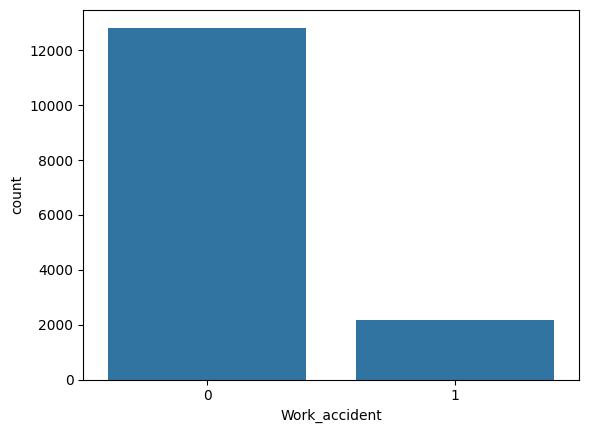

In [14]:
sns.countplot(x='Work_accident',data=df)
#very few people committed accident at work place

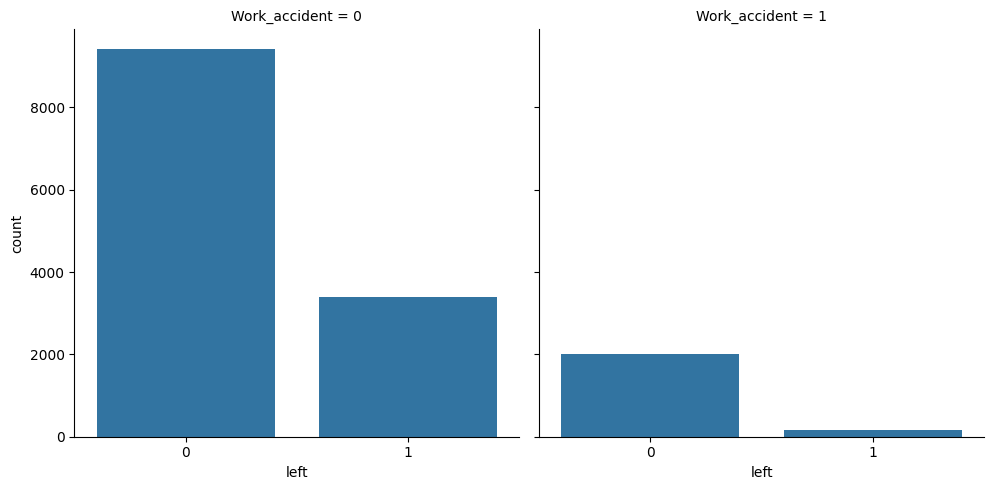

In [15]:
sns.catplot(x='left',col='Work_accident',kind='count',data=df)
#conclusion: people who did not commit any accident left more; not an imp feature

/tmp/ipykernel_17/667929916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['satisfaction_level'])


<Axes: xlabel='satisfaction_level', ylabel='Density'>

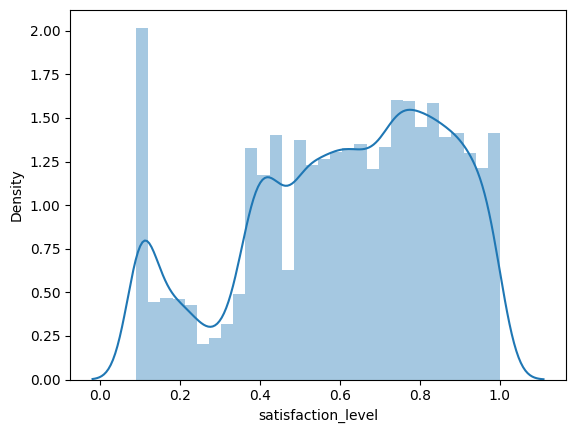

In [16]:
sns.distplot(df['satisfaction_level'])

<Axes: xlabel='left', ylabel='satisfaction_level'>

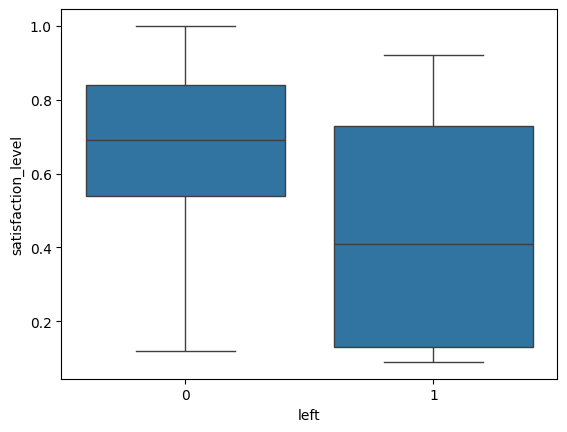

In [17]:
sns.boxplot(x='left',y='satisfaction_level',data=df)
#employee who left more have less satisfaction level (0.2 to 0.5)

/tmp/ipykernel_17/487619780.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['number_project'])


<Axes: xlabel='number_project', ylabel='Density'>

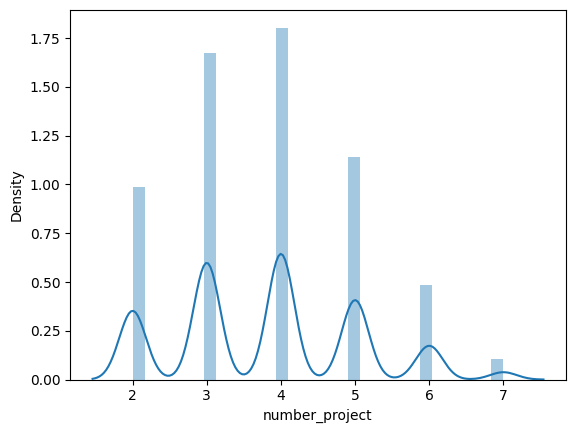

In [18]:
sns.distplot(df['number_project'])

<Axes: xlabel='left', ylabel='number_project'>

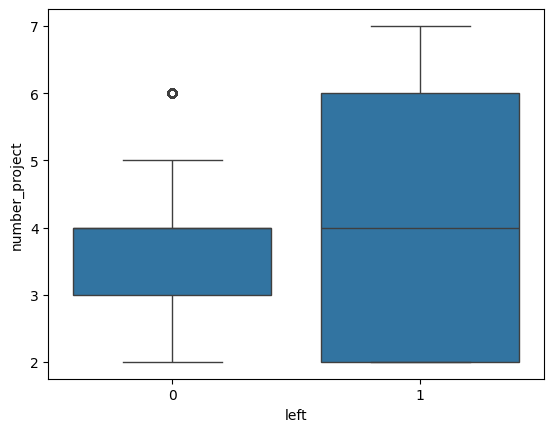

In [19]:
sns.boxplot(x='left',y='number_project',data=df)

/tmp/ipykernel_17/3558093561.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['last_evaluation'])


<Axes: xlabel='last_evaluation', ylabel='Density'>

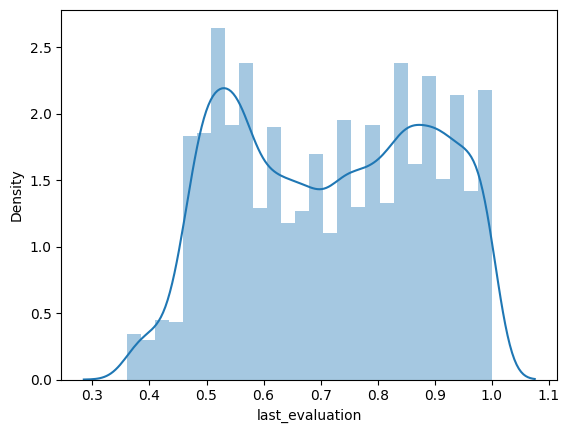

In [20]:
sns.distplot(df['last_evaluation'])

<Axes: xlabel='left', ylabel='last_evaluation'>

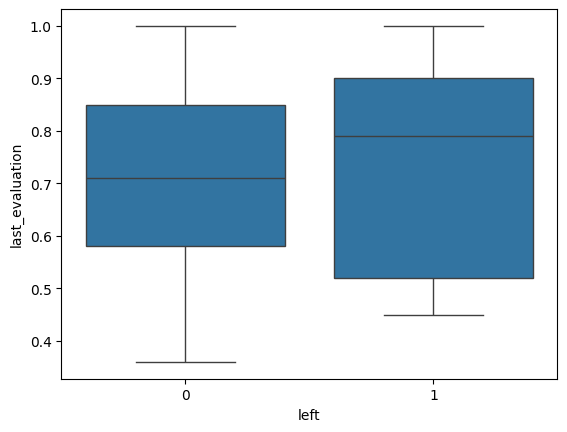

In [21]:
sns.boxplot(x='left', y='last_evaluation',data=df)

/tmp/ipykernel_17/4008227430.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['average_montly_hours'])


<Axes: xlabel='average_montly_hours', ylabel='Density'>

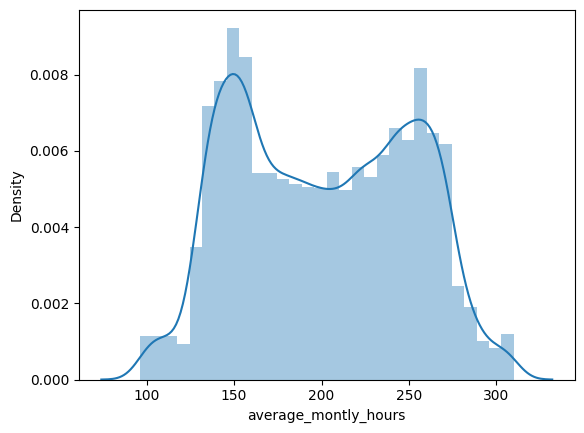

In [22]:
sns.distplot(df['average_montly_hours'])

<Axes: xlabel='left', ylabel='average_montly_hours'>

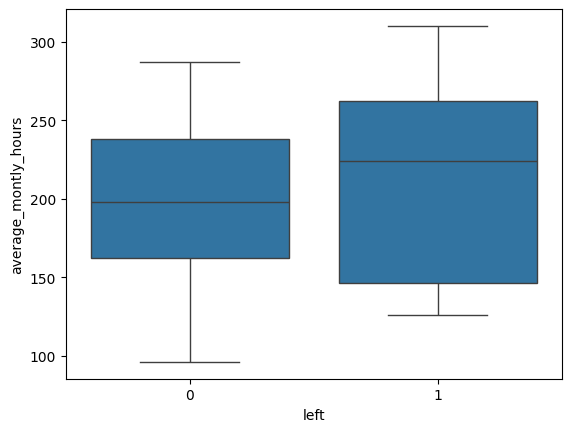

In [23]:
sns.boxplot(x='left',y='average_montly_hours', data=df)

/tmp/ipykernel_17/1637010911.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['time_spend_company'])


<Axes: xlabel='time_spend_company', ylabel='Density'>

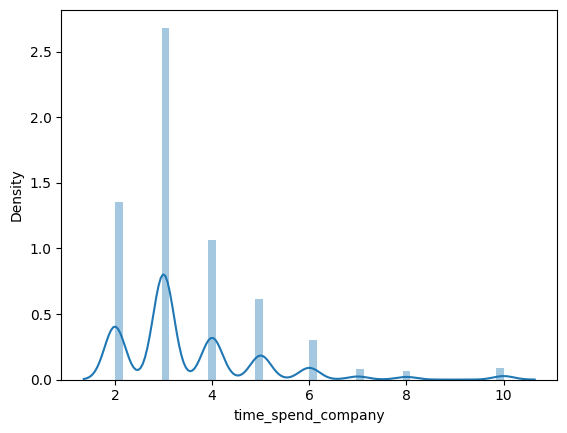

In [24]:
sns.distplot(df['time_spend_company'])

<Axes: xlabel='left', ylabel='time_spend_company'>

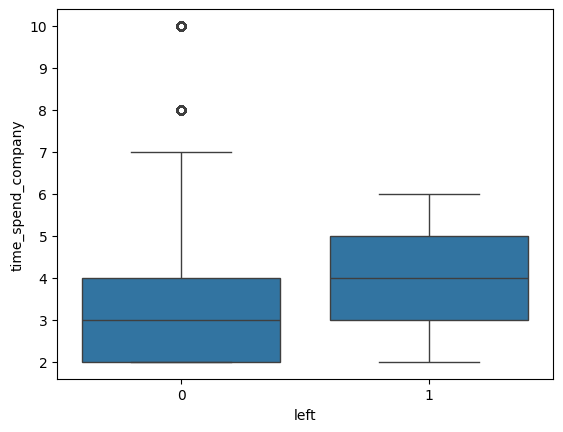

In [25]:
sns.boxplot(x='left',y='time_spend_company',data=df)

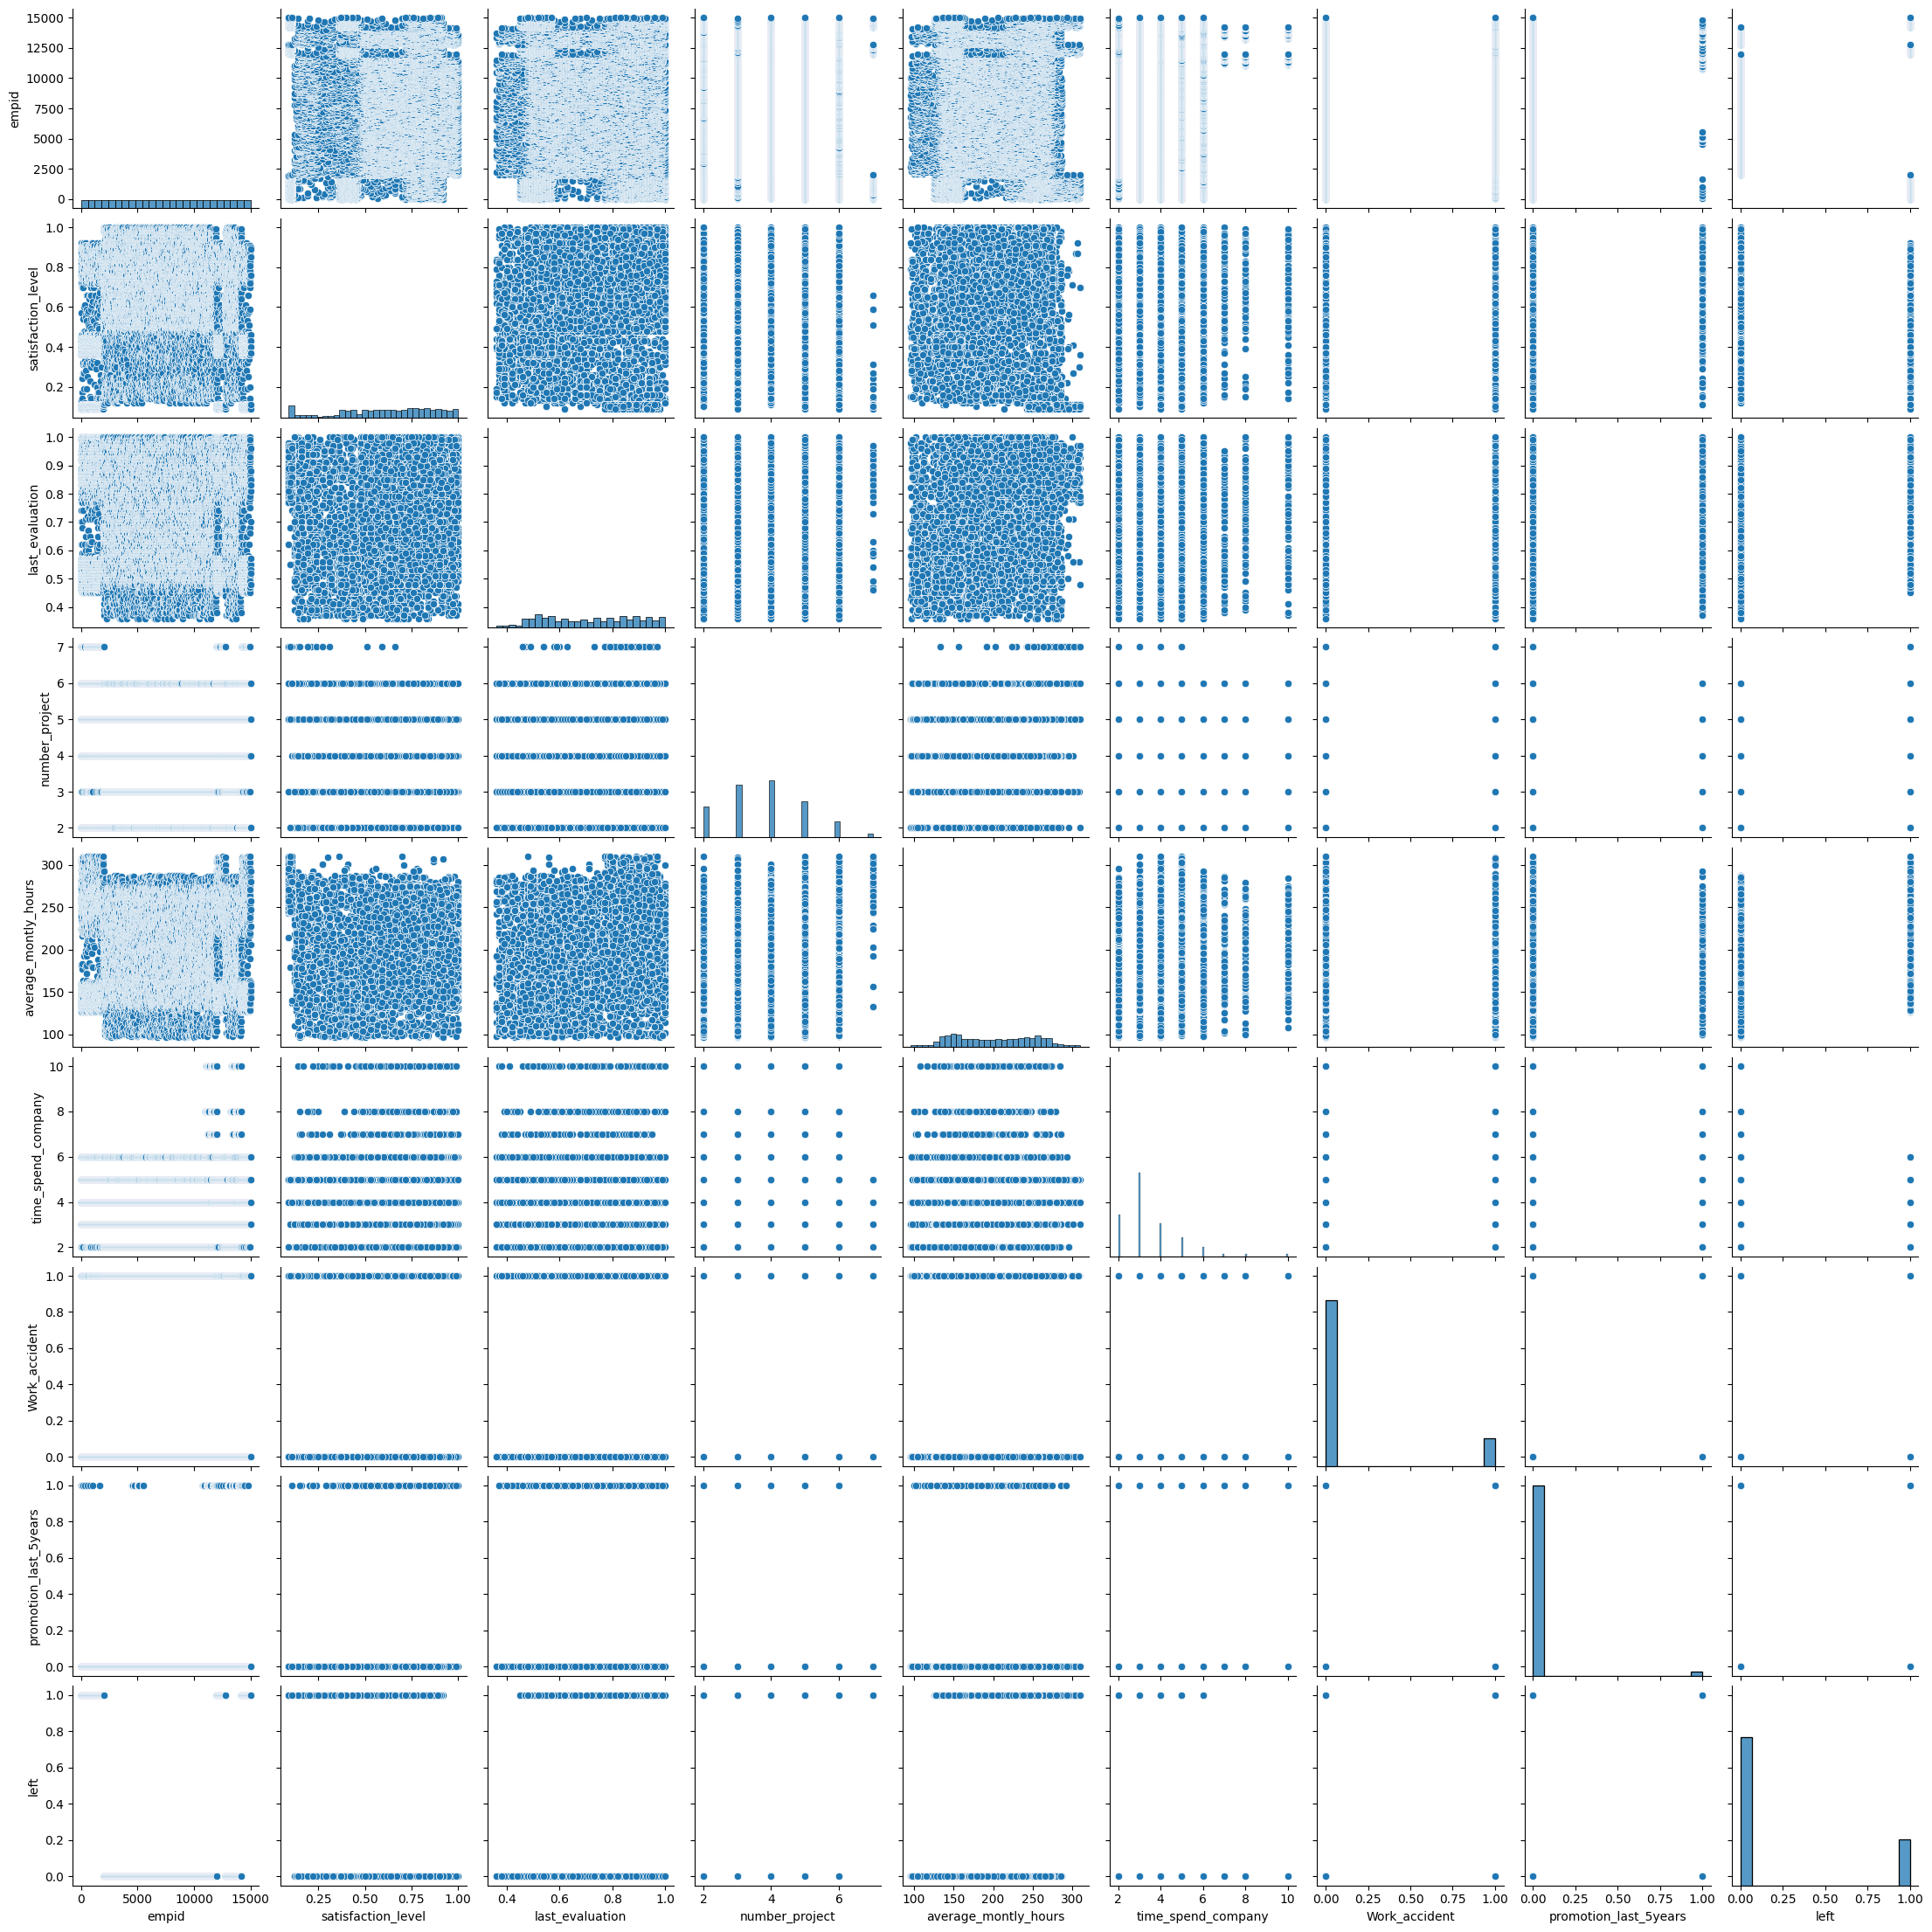

In [26]:
sns.pairplot(df)

**Feature Engineering**

i) Handle missing values

In [27]:
df2 = df.copy()

In [28]:
df2.drop(['empid'],axis=1,inplace=True)
#delete column from df2 only

In [29]:
df2.isnull().sum()
#find missing values column wise

satisfaction_level       2
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [30]:
#handle missing values in satisfaction_level
df['satisfaction_level'].describe()

count    14997.000000
mean         0.612863
std          0.248634
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

In [31]:
# Re-assign the column to itself with missing values filled by its mean
df2['satisfaction_level'] = df2['satisfaction_level'].fillna(df2['satisfaction_level'].mean())

In [32]:
#handle missing values in satisfaction_level
df2['satisfaction_level'].describe()

count    14999.000000
mean         0.612863
std          0.248618
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

In [33]:
df2.isnull().sum()
#find missing values column wise

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [34]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

ii) One-Hot Encoding of categorical data

In [35]:
salary_dummies = pd.get_dummies(df2['salary'],drop_first=True)

In [36]:
salary_dummies

,low,medium
0,True,False
1,False,True
2,False,True
3,True,False
4,True,False
...,...,...
14994,True,False
14995,True,False
14996,True,False
14997,True,False


In [37]:
#col wise concat salary_dummies to original df2
df2=pd.concat([df2,salary_dummies],axis=1)

In [38]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,low,medium
0,0.38,0.53,2,157,3,0,0,low,1,True,False
1,0.80,0.86,5,262,6,0,0,medium,1,False,True
2,0.11,0.88,7,272,4,0,0,medium,1,False,True
3,0.72,0.87,5,223,5,0,0,low,1,True,False
4,0.37,0.52,2,159,3,0,0,low,1,True,False


In [39]:
#remove salary col since not required anymore
df2.drop(['salary'],axis=1,inplace=True)

In [40]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,low,medium
0,0.38,0.53,2,157,3,0,0,1,True,False
1,0.80,0.86,5,262,6,0,0,1,False,True
2,0.11,0.88,7,272,4,0,0,1,False,True
3,0.72,0.87,5,223,5,0,0,1,True,False
4,0.37,0.52,2,159,3,0,0,1,True,False


Split dataset into training set and test set

In [41]:
#input feature should not contain target col ('left')
#output should contain only target col ('left')
X = df2.drop(labels='left',axis=1)
y = df2['left']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [43]:
len(X_train)

11999

In [44]:
len(X_test)

3000

Model selection

In [45]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [46]:
#create parameters
model_param = {
    "RandomForestClassifier":{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators':[10,50,100,130],
            'criterion':['gini','entropy'],
            'max_depth':range(2,4,1),
            'max_features':['auto','log2']
        }
    },
    "XGBClassifier":{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
            'learning_rate':[0.5,0.1,0.01,0.001],
            'max_depth':[3,5,10,20],
            'n_estimators':[10,50,100,200]
        }
    }
}
#these are all random values. 
#GridSearchCV will which is better: XGBoost or RandomForest

In [47]:
#to apply GridSearchCV on these two models
scores=[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model':model_name,
        'best_score':model_selection.best_score_,
        'best_params':model_selection.best_params_
    })

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/

In [48]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': np.float64(0.9239304657107924),
  'best_params': {'criterion': 'gini',
   'max_depth': 3,
   'max_features': 'log2',
   'n_estimators': 10}},
 {'model': 'XGBClassifier',
  'best_score': np.float64(0.9906661776147605),
  'best_params': {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 200}}]

XGBoost is giving best accuracy

**Model Building**

In [49]:
model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=20,n_estimators=200)
#these values are taken from above result

In [50]:
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=20,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [51]:
model_xgb.score(X_test,y_test)

0.992

In [52]:
X_test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,low,medium
1670,0.44,0.57,2,141,3,0,0,False,True
13378,0.55,0.96,3,194,3,0,0,False,True
10233,0.72,0.67,5,210,2,0,0,False,True
4719,0.96,0.75,4,177,2,0,0,True,False
7003,0.96,0.54,3,198,3,0,0,True,False


In [53]:
#lets predict results of first row of test data
model_xgb.predict(X_test[:1])

array([1])

In [54]:
#lets find actual result of first row of test data from df
df.loc[1670]

empid                      1671
satisfaction_level         0.44
last_evaluation            0.57
number_project                2
average_montly_hours        141
time_spend_company            3
Work_accident                 0
promotion_last_5years         0
salary                   medium
left                          1
Name: 1670, dtype: object

Actual and predicted value is same

In [55]:
#Confusion matrix for true values vs predicted values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model_xgb.predict(X_test))
cm

array([[2291,    8],
       [  16,  685]])

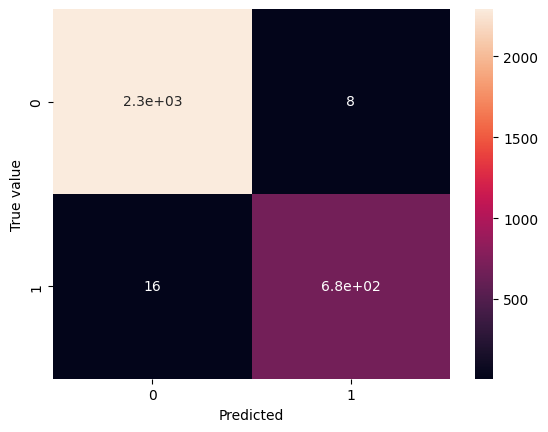

In [56]:
#plot confusion matrix
from matplotlib import pyplot as plt
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True value')
plt.show()